Investments in multiple securities shouldn’t be analyzed separately, but should be considered in a portfolio. Markowitz proved the existence of an efficient set of portfolios that optimize investors’ return for
the amount of risk they are willing to accept. He suggested that through the combination of securities with low correlation, investors can optimize their returns without assuming additional risk.

Share_A: expected return $r_1$, Std. deviation $\sigma_1$

Share_B: expected return $r_2$, Std. deviation $\sigma_2$

Correlation A,B: $\rho_{12}$

Expected returt of the portfolio: $r_p= \omega_1r_1 + \omega_2r_2$

Portfolio volatility (std. deviation): $\sqrt{\omega_1^2\sigma_1^2+ \omega_2^2\sigma_2^2+ 2\omega_1\sigma_1 \omega_2\sigma_2 \rho_{12}}$


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2011-1-1')['Adj Close']

# pf_data.tail()

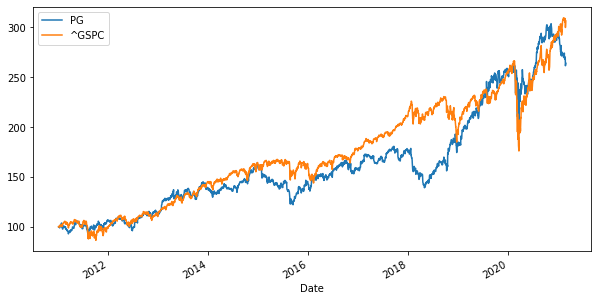

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean() * 250

PG       0.094908
^GSPC    0.109493
dtype: float64

In [6]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.030332,0.018025
^GSPC,0.018025,0.030369


In [7]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.593901
^GSPC,0.593901,1.000000


In [8]:
num_assets = len(assets)
num_assets

2

In [9]:
# generate random weights
#
arr = np.random.random(2)
arr

array([0.03226071, 0.02746332])

In [10]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
# weights
# assert weights.sum() == 1, "Total sum of weights should be 1"

Markowitz mean theorem theory

In [11]:
# Expected portfolio return
#
np.sum(weights * log_returns.mean()) * 250

0.10597813974808985

In [12]:
# Expected portfolio variance
#
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02585095599347576

In [17]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns[:10] , pfolio_volatilities[:10]

(array([0.09502835, 0.10381605, 0.1025966 , 0.09676689, 0.10111779,
        0.09781936, 0.10332461, 0.09775686, 0.10495404, 0.10125463]),
 array([0.17358486, 0.15650707, 0.15558674, 0.16612126, 0.15595293,
        0.16248626, 0.156004  , 0.16268236, 0.15834577, 0.15585082]))

In [20]:
portfolios = pd.DataFrame({
    'Return': pfolio_returns,
    'Volatility': pfolio_volatilities
})

In [22]:
portfolios.tail()

,Return,Volatility
995,0.103143,0.155863
996,0.109484,0.174220
997,0.100413,0.156697
998,0.096170,0.168486
999,0.099366,0.158469


Efficient frontier

Text(0, 0.5, 'Expected Return')

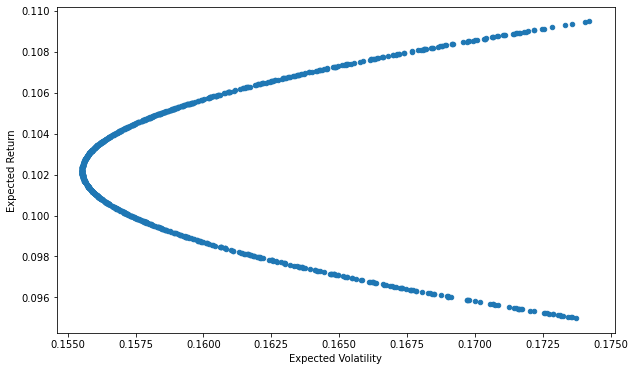

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')